<img src='1.webp'/>

## About the Dataset

This dataset contains information about individuals and their medical charges. Here are the columns:

| Column    | Description                                   |
|-----------|-----------------------------------------------|
| age       | Age of the individual.                        |
| sex       | Gender of the individual (Male/Female).       |
| bmi       | Body Mass Index of the individual.            |
| children  | Number of children/dependents covered.        |
| smoker    | Smoking status (Yes/No).                      |
| region    | Geographical region of the individual.        |
| charges   | Medical charges incurred by the individual.   |

In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [2]:
px.defaults.width = 800

Data Preprocessing

In [3]:
data = pd.read_csv('insurance.csv')

In [4]:
# Displaying the first 5 rows in the dataset
display('First 5 rows in the dataset', data.head())

# Displaying the last 5 rows in the dataset
display('Last Five rows in the dataset', data.tail())

# Displaying a random sample from the dataset
display('Random Sample', data.sample())

# Displaying descriptive statistics of the dataset
display('Descriptive Statistics', data.describe())

# Displaying information about the dataset
display('Dataset Information')
display(data.info())

# Creating a DataFrame with information about columns
columns_info = pd.DataFrame({
    'Features': data.columns.values,
    'Data Types': [data[col].dtype for col in data.columns],
    'Null Values': [data[col].isna().sum() for col in data.columns],
    'Percentage of Null values': [(data[col].isna().sum()/len(data) * 100) for col in data.columns],
    'Duplicate Values': [data.duplicated().sum() for col in data.columns],
    'Number of Unique Values': [data[col].nunique() for col in data.columns],
})

# Displaying information about columns
display('Columns Information', columns_info)

# Print additional  information
print('\n')
print('----------------------------------------------------------------------------------------------------')
print(f'Total Columns= {data.shape[1]}')
print(f'Total Rows= {data.shape[0]}')
print(f"Total Columns that have missing values= {data.isnull().any().sum()} ")
print(f'Total Rows that have missing values= {data.isnull().sum().sum()}')
print(f'Total Percentage of Missing Values= {(data.isnull().sum().sum() / (data.shape[0] * data.shape[1])) * 100}')

'First 5 rows in the dataset'

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


'Last Five rows in the dataset'

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


'Random Sample'

,age,sex,bmi,children,smoker,region,charges
729,41,female,36.08,1,no,southeast,6781.3542


'Descriptive Statistics'

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


'Dataset Information'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

'Columns Information'

,Features,Data Types,Null Values,Percentage of Null values,Duplicate Values,Number of Unique Values
0,age,int64,0,0.0,1,47
1,sex,object,0,0.0,1,2
2,bmi,float64,0,0.0,1,548
3,children,int64,0,0.0,1,6
4,smoker,object,0,0.0,1,2
5,region,object,0,0.0,1,4
6,charges,float64,0,0.0,1,1337




----------------------------------------------------------------------------------------------------
Total Columns= 7
Total Rows= 1338
Total Columns that have missing values= 0 
Total Rows that have missing values= 0
Total Percentage of Missing Values= 0.0


Data Analysis/ Visualization

In [15]:
fig = px.scatter(data, x='age', y='charges', color='smoker', title='Scatter Plot of Age vs Charges')
fig.show()

In [14]:
fig = px.box(data, x='region', y='charges', title='Box Plot for Regions vs Charges')
fig.show()

In [16]:
fig = px.histogram(data, x='bmi', title='BMI Distribution')
fig.show()

In [18]:
fig = px.scatter(data, x='bmi', y='charges', color='children', size='children', title='Bubble Chart of BMI and Charges')
fig.show()

In [19]:
fig = px.bar(data, x='smoker', y='charges', title='Average Charges for Smokers and Non-Smokers')
fig.show()

In [20]:
fig = px.scatter_3d(data, x='age', y='bmi', z='charges', color='smoker', title='3D Scatter Plot for Age, BMI and Charges')
fig.show()

In [22]:
fig = px.scatter_matrix(data, dimensions=['age', 'bmi', 'charges'], title='Pair Plot for Age, BMI and Charges')
fig.show()

In [24]:
fig =px.bar(
    data,
    x='region',
    color='children',
    title='Distribution of Smokers'
)
fig.show()

Label Encoding

In [26]:
# encoding sex column
data.replace({'sex':{'male':0, 'female':1}}, inplace=True)

# encoding smoker column
data.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

# encoding region column
data.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

Feature Selection

In [41]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [50]:
X= data.drop(columns=['charges'], axis=1)
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [51]:
y = data['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

Train/Test Split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)


Models

<b>1. Linear regression<b>

In [53]:
model_lr = LinearRegression()

In [54]:
model_lr.fit(X_train, y_train)

LinearRegression()

In [55]:
y_pred_lr =model_lr.predict(X_test)
y_pred_lr[:5]

array([ 8807.42198314,  7418.93409   , 37602.08038738,  9677.798378  ,
       27320.94145293])

Evaluation

In [56]:
train_score =model_lr.score(X_train,y_train)
test_score =model_lr.score(X_test,y_test)
print('Training Score', train_score)
print('Test Score', test_score)

Training Score 0.7487682853101583
Test Score 0.7648315334268356


In [91]:
r2_lr = r2_score(y_test, y_pred_lr)
print('R-squared Score', r2_lr)

R-squared Score 0.7648315334268356


<b>2. Ridge regression <b>

In [65]:
model_Rd = Ridge()

In [66]:
model_Rd.fit(X_train, y_train)

Ridge()

In [67]:
y_pred_Rd=model_Rd.predict(X_test)
y_pred_Rd[:5]

array([ 8826.72356895,  7436.37160174, 37493.7984919 ,  9702.75761645,
       27226.38445517])

In [68]:
train_score =model_Rd.score(X_train,y_train)
test_score =model_Rd.score(X_test,y_test)
print('Training Score', train_score)
print('Test Score', test_score)

Training Score 0.7487518591111109
Test Score 0.7650565827267959


In [69]:
r2_Rd = r2_score(y_test, y_pred_Rd)
print('R-squared Score', r2_Rd)

R-squared Score 0.7650565827267959


Comparing the R-squared values for the different Algorithm

In [70]:
result_df = pd.DataFrame({
    'Model Name': ['Linear Regression', 'Ridge Regression'],
    'R-squared':[r2_lr,r2_Rd]
})

In [71]:
result_df.head()

,Model Name,R-squared
0,Linear Regression,0.764832
1,Ridge Regression,0.765057


Visualizing the R-squared

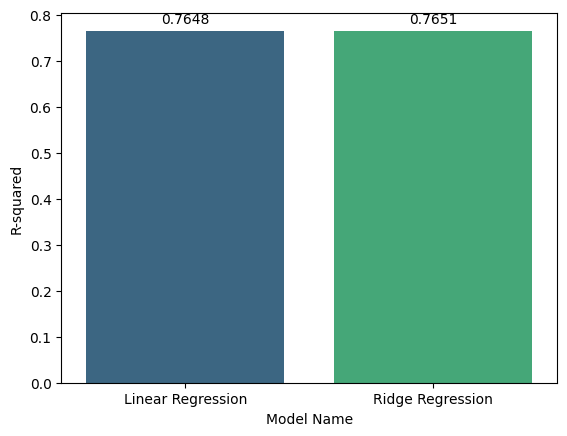

In [88]:

sns.barplot(x=result_df['Model Name'], y=result_df['R-squared'], data=result_df, palette='viridis')

# Adding text annotations
for i, value in enumerate(result_df['R-squared']):
    plt.text(i, value + 0.01, f'{value:.4f}', ha='center', va='bottom')

# Setting x-axis ticks and labels
plt.xticks([0, 1], result_df['Model Name'])

# Display the plot
plt.show()

<b>Observations:</b>

From the bar plot, In comparison with the R-squared value, it is evident that Ridge Regression exhibits a higher R-squared value compared to Linear Regression, suggesting that the Ridge Regression model provides a better fit to the data according to this particular evaluation metric.

Cross Validation

In [103]:
ridge_cv_scores = cross_val_score(model_Rd, X, y, cv=5, scoring='r2')
ridge_avg_r2 = np.mean(ridge_cv_scores)

In [104]:
print('Cross validation score:' ,ridge_cv_scores)
print(f'Ridge Regression Average R-squared: {ridge_avg_r2:.4f}')

Cross validation score: [0.76273097 0.70720204 0.77618076 0.73229281 0.75671067]
Ridge Regression Average R-squared: 0.7470


In [105]:
import joblib
joblib.dump(model_Rd, 'ridge_regression_model.joblib')

['ridge_regression_model.joblib']